In [13]:
%cd drive/MyDrive/projects/toxicity-multiclass
!ls

/content/drive/MyDrive/projects/toxicity-multiclass
artifacts  configs  models     pyproject.toml  reports	scripts  tests
chapters   data     notebooks  README.md       results	src


In [14]:
import os
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Errno 2] No such file or directory: 'drive/MyDrive/projects/toxicity-multiclass'
/content
results  sample_data


In [15]:
XGB_JSON = "results/xgboost_results.json"
MLP_JSON = "results/mlp_results.json"

os.makedirs("results/figures", exist_ok=True)

In [16]:
with open(XGB_JSON, "r") as f:
    xgb_results = json.load(f)

with open(MLP_JSON, "r") as f:
    mlp_results = json.load(f)

print("Loaded results:")
print(" - XGBoost")
print(" - MLP")


Loaded results:
 - XGBoost
 - MLP


In [17]:
comparison = pd.DataFrame({
    "XGBoost": {
        "Macro F1": xgb_results["test"]["macro_f1"],
        "Macro ROC-AUC": xgb_results["test"]["macro_roc_auc"],
    },
    "MLP": {
        "Macro F1": mlp_results["test"]["macro_f1"],
        "Macro ROC-AUC": mlp_results["test"]["macro_roc_auc"],
    }
}).T

print("\n=== Macro metrics (TEST) ===")
display(comparison)

comparison.to_csv("results/comparison_macro_metrics.csv")
print("Saved: results/comparison_macro_metrics.csv")


=== Macro metrics (TEST) ===


,Macro F1,Macro ROC-AUC
XGBoost,0.405931,0.785202
MLP,0.359590,0.750499


Saved: results/comparison_macro_metrics.csv


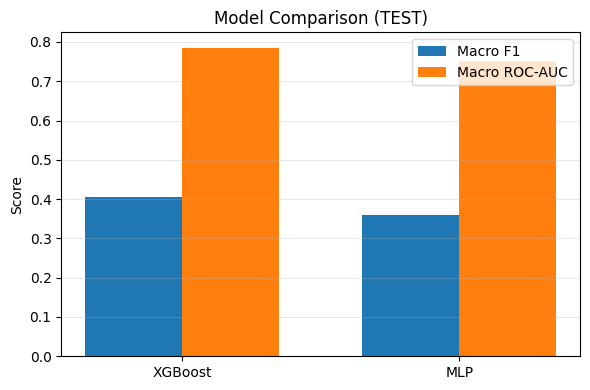

Saved: results/figures/compare_macro_metrics.png


In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.arange(len(comparison.index))
width = 0.35

ax.bar(x - width/2, comparison["Macro F1"], width, label="Macro F1")
ax.bar(x + width/2, comparison["Macro ROC-AUC"], width, label="Macro ROC-AUC")

ax.set_xticks(x)
ax.set_xticklabels(comparison.index)
ax.set_ylabel("Score")
ax.set_title("Model Comparison (TEST)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("results/figures/compare_macro_metrics.png", dpi=150)
plt.show()

print("Saved: results/figures/compare_macro_metrics.png")

In [19]:
tasks = list(xgb_results["test"]["per_task"].keys())

per_task_df = pd.DataFrame(index=tasks)

per_task_df["XGBoost"] = [
    xgb_results["test"]["per_task"][t]["f1"] for t in tasks
]

per_task_df["MLP"] = [
    mlp_results["test"]["per_task"][t]["f1"] for t in tasks
]

print("\n=== Per-task F1 (TEST) ===")
display(per_task_df)

per_task_df.to_csv("results/comparison_per_task_f1.csv")
print("Saved: results/comparison_per_task_f1.csv")


=== Per-task F1 (TEST) ===


,XGBoost,MLP
NR-AR,0.459016,0.622222
NR-AR-LBD,0.595745,0.666667
NR-AhR,0.430769,0.460177
NR-Aromatase,0.383562,0.408163
NR-ER,0.371041,0.158416
NR-ER-LBD,0.357895,0.310345
NR-PPAR-gamma,0.313725,0.000000
SR-ARE,0.485437,0.458599
SR-ATAD5,0.376812,0.307692
SR-HSE,0.242991,0.325581


Saved: results/comparison_per_task_f1.csv


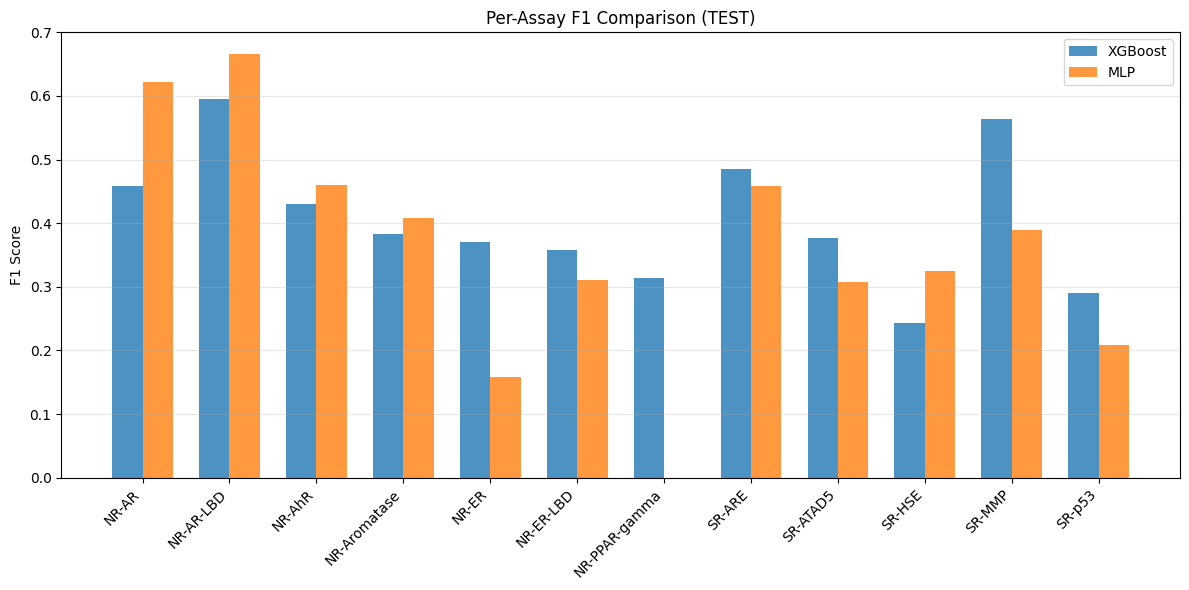

Saved: results/figures/compare_per_task_f1.png


In [20]:
x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, per_task_df["XGBoost"], width, label="XGBoost", alpha=0.8)
ax.bar(x + width/2, per_task_df["MLP"], width, label="MLP", alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha="right")
ax.set_ylabel("F1 Score")
ax.set_title("Per-Assay F1 Comparison (TEST)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("results/figures/compare_per_task_f1.png", dpi=150)
plt.show()

print("Saved: results/figures/compare_per_task_f1.png")


In [21]:
print("\nBest assays (by F1):")
print(per_task_df.sort_values("XGBoost", ascending=False).head(3))

print("\nMost difficult assays (by F1):")
print(per_task_df.sort_values("XGBoost", ascending=True).head(3))

print("\nComparison complete.")


Best assays (by F1):
            XGBoost       MLP
NR-AR-LBD  0.595745  0.666667
SR-MMP     0.563265  0.388889
SR-ARE     0.485437  0.458599

Most difficult assays (by F1):
                XGBoost       MLP
SR-HSE         0.242991  0.325581
SR-p53         0.290909  0.208333
NR-PPAR-gamma  0.313725  0.000000

Comparison complete.
